In [ ]:
import pandas as pd
import numpy as np
import math

data = {
    'High School GPA': [3.8, 3.2, 4.0, 2.5, 3.6],
    'SAT Score': [1450, 1300, 1500, 1200, 1400],
    'Extracurricular Activities': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'Recommendation Letter Strength': ['Strong', 'Weak', 'Strong', 'Weak', 'Strong'],
    'Admission Status': ['Admitted', 'Not Admitted', 'Admitted', 'Not Admitted', 'Admitted']
}

df = pd.DataFrame(data)

def entropy(data):
    labels = data['Admission Status']
    n = len(labels)
    if n <= 1:
        return 0
    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n
    return -np.sum(probs * np.log2(probs))

def information_gain(data, attribute):
    values, counts = np.unique(data[attribute], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data[data[attribute] == values[i]]) for i in range(len(values))])
    return entropy(data) - weighted_entropy

def select_best_attribute(data, attributes):
    gains = [information_gain(data, attribute) for attribute in attributes]
    best_attribute_index = np.argmax(gains)
    return attributes[best_attribute_index]

def id3(data, attributes, target_attribute, default_class=None):
    if len(np.unique(data[target_attribute])) == 1:
        return np.unique(data[target_attribute])[0]
    elif len(attributes) == 0:
        return default_class
    else:
        default_class = np.argmax(np.bincount(data[target_attribute]))
        best_attribute = select_best_attribute(data, attributes)
        tree = {best_attribute: {}}
        for value in np.unique(data[best_attribute]):
            sub_data = data.where(data[best_attribute] == value).dropna()
            subtree = id3(sub_data, [attr for attr in attributes if attr != best_attribute], target_attribute, default_class)
            tree[best_attribute][value] = subtree
        return tree

df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Recommendation Letter Strength'] = df['Recommendation Letter Strength'].map({'Strong': 1, 'Weak': 0})

df['Admission Status'] = df['Admission Status'].map({'Admitted': 1, 'Not Admitted': 0})

attributes = df.columns[:-1].tolist()

tree = id3(df, attributes, 'Admission Status')

print(tree)


{'High School GPA': {2.5: 0.0, 3.2: 0.0, 3.6: 1.0, 3.8: 1.0, 4.0: 1.0}}


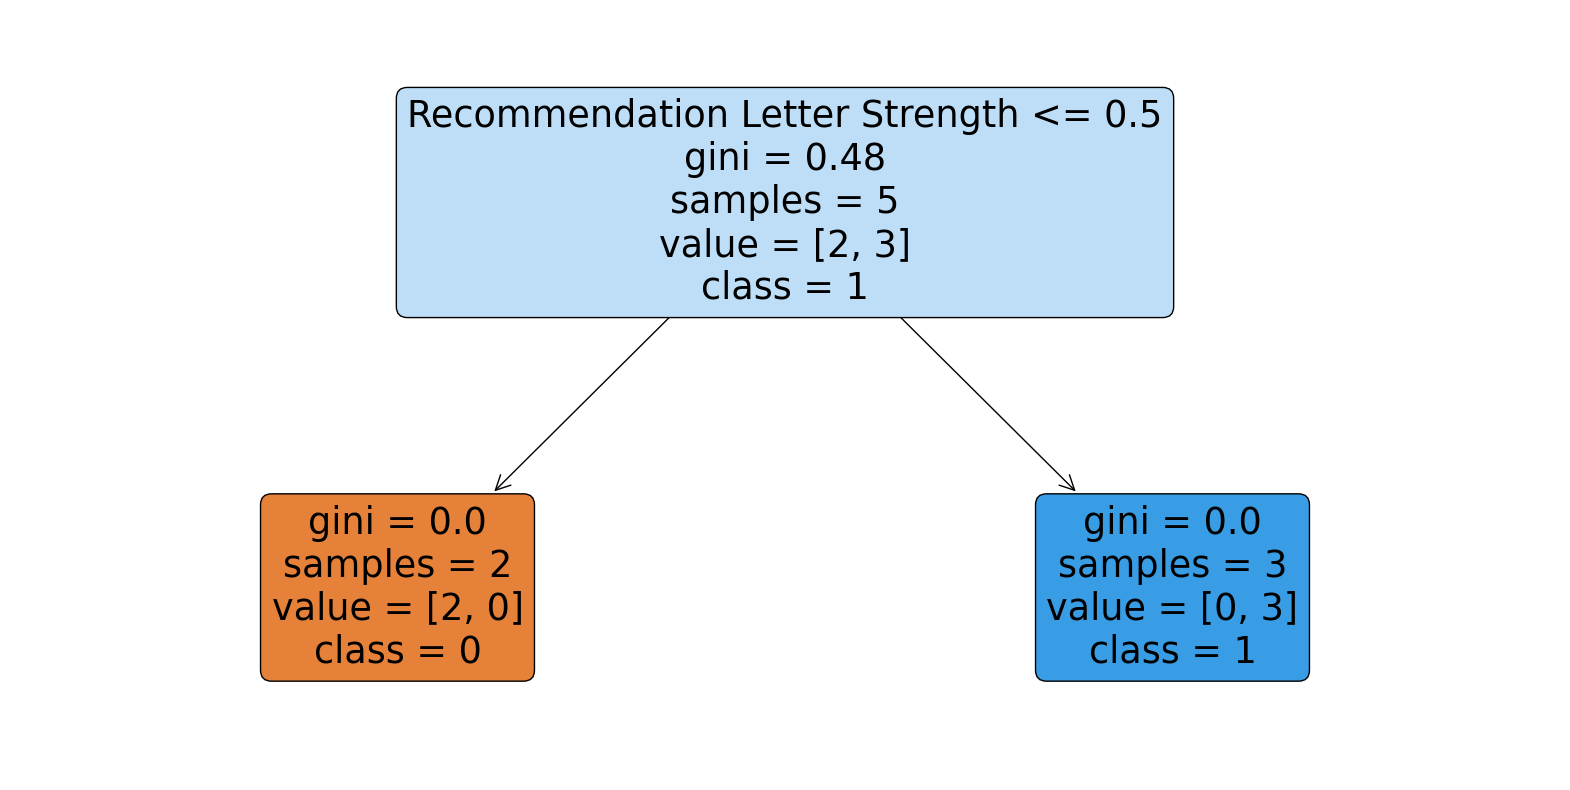

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Define the dataset
data = {
    'High School GPA': [3.8, 3.2, 4.0, 2.5, 3.6],
    'SAT Score': [1450, 1300, 1500, 1200, 1400],
    'Extracurricular Activities': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'Recommendation Letter Strength': ['Strong', 'Weak', 'Strong', 'Weak', 'Strong'],
    'Admission Status': ['Admitted', 'Not Admitted', 'Admitted', 'Not Admitted', 'Admitted']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical attributes to numerical
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Recommendation Letter Strength'] = df['Recommendation Letter Strength'].map({'Strong': 1, 'Weak': 0})
df['Admission Status'] = df['Admission Status'].map({'Admitted': 1, 'Not Admitted': 0})

# Define features and target
X = df.drop(columns=['Admission Status'])
y = df['Admission Status']

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(X, y)

from sklearn.tree import export_text
column_names=df.columns

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
a = []
for i in clf.classes_ :
  a.append(str(i))
plot_tree(clf, filled=True, feature_names=column_names[:-1], class_names=a, rounded=True)
plt.show()

In [ ]:
test_data = {
    'High School GPA': [3.5],
    'SAT Score': [1350],
    'Extracurricular Activities': ['Yes'],
    'Recommendation Letter Strength': ['Weak']
}

test_df = pd.DataFrame(test_data)


def predict(tree, sample):
    if isinstance(tree, dict):
        attribute = list(tree.keys())[0]
        value = sample[attribute]
        if value not in tree[attribute]:
            return "Not Admitted"
        subtree = tree[attribute][value]
        return predict(subtree, sample)
    else:
        return tree

prediction = predict(tree, test_df.iloc[0])
print("Prediction for the test data:", prediction)




Prediction for the test data: Not Admitted
